# MOVEIT!    LAUNCH IT!
#OSCII CODED

## Setup

必要なライブラリをインポートして、初期化を行います。

Import the required libraries and initialize them:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ros_numpy
import rospy
import tf
from gazebo_ros import gazebo_interface
from sensor_msgs.msg import LaserScan, PointCloud2
from geometry_msgs.msg import Pose, Quaternion
import sys
import time

from utils_notebooks import *
import cv2
import os




the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'


In [2]:
import moveit_commander
import moveit_msgs.msg
head = moveit_commander.MoveGroupCommander('head')

In [10]:


## THIS PATH MUST BE SET BY USER () 


#_path_model = "/home/oscar/Codes/ycb_ws/src/robot_object_views/robotobject/models"   Tenshi Version

#_path_model = "/home/oscar/Codes/catkin_mio_ws/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 
_path_model = "/home/roboworks/Codes/catkin_mio/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 


objs=os.listdir(_path_model)
objs.sort()
print (objs)

['person_standing', 'trofast', 'wrc_bin_black', 'wrc_bin_green', 'wrc_bookshelf', 'wrc_container_a', 'wrc_container_b', 'wrc_frame', 'wrc_ground_plane', 'wrc_long_table', 'wrc_stair_like_drawer', 'wrc_tall_table', 'wrc_tray', 'ycb_002_master_chef_can', 'ycb_003_cracker_box', 'ycb_004_sugar_box', 'ycb_005_tomato_soup_can', 'ycb_006_mustard_bottle', 'ycb_007_tuna_fish_can', 'ycb_008_pudding_box', 'ycb_009_gelatin_box', 'ycb_010_potted_meat_can', 'ycb_011_banana', 'ycb_012_strawberry', 'ycb_013_apple', 'ycb_014_lemon', 'ycb_015_peach', 'ycb_016_pear', 'ycb_017_orange', 'ycb_018_plum', 'ycb_019_pitcher_base', 'ycb_021_bleach_cleanser', 'ycb_022_windex_bottle', 'ycb_024_bowl', 'ycb_025_mug', 'ycb_026_sponge', 'ycb_027_skillet', 'ycb_028_skillet_lid', 'ycb_029_plate', 'ycb_030_fork', 'ycb_031_spoon', 'ycb_032_knife', 'ycb_033_spatula', 'ycb_035_power_drill', 'ycb_036_wood_block', 'ycb_037_scissors', 'ycb_038_padlock', 'ycb_040_large_marker', 'ycb_042_adjustable_wrench', 'ycb_043_phillips_scr

In [11]:
#AGAIN THIS PATH MUST BE SET ( IT IS LOCATED IN NOTEBOOK UTILS FILE utils_notebooks.py)

rvizを起動します．ロボットモデル、カメラ映像、ポイントクラウドが表示されています。

In [12]:
#Initialize  Ros Node
rospy.init_node("recognition")


In [13]:
#create a RGBD() object to read xtion
rgbd = RGBD()

In [14]:
#Create a tf listener to read tf tree ( shockingly)
listener = tf.TransformListener()
rospy.sleep(.5)

Launch RViz. The robot model, camera image, and point cloud are displayed:

In [15]:
def gazebo_2_world(x,y):

    x_world= x+2.1
    y_world= -(y-1.2)
    return (x_world,y_world)

def world_2_gazebo(y_world , x_world):

    x= ( x_world - 2.1)
    y= (-y_world + 1.2) 
    return (x , y)

In [16]:
#Get pose of the xtion w.r.t map frame 
#( odom , or hsrb base vfootprint might obe other 
#useful reference frames)


trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler

([1.378045544752591, 0.2038349225464695, 1.0040790291871795],
 (-4.896528738956181e-12, 0.5002129606383336, 0.07003127419640509))

In [35]:
#moveit
#MOVE IT MUST BE RUNNING. DECLARE A HEAD POSE
head_val=head.get_current_joint_values()
head_val[0]=np.deg2rad(-80)
head_val[1]=np.deg2rad(20)
#WATCH OUT FOR JOINTS LIMITS (exorcist joke)

In [36]:
#plan and execute target pose
head.set_joint_value_target(head_val)
head.go()

True

In [38]:
#Get pose of the xtion w.r.t map frame 

trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler


([1.2647726624184392, 0.30954000026448963, 0.9516651466874427],
 (-4.896553893661598e-12, -0.3506815167333653, -1.4930767820502555))

In [39]:
model_name = objs[79]
print model_name

ycb_072-a_toy_airplane


In [41]:
#USE TRANSFORM TREE TF TO SPAWN A STATIC MODEL
# D_to_cam  METERS AWAY FROM XTION ON THE dIRECTION OF IT FOCAL POINT


#x_gaz,y_gaz=world_2_gazebo(1.15,0.02)
deg=0
D_to_cam= 0.6
x_gaz,y_gaz=world_2_gazebo(+trans[0]+ D_to_cam * np.cos(euler[2]), +  trans[1]+ D_to_cam * np.sin(euler[2]))
z_gaz= trans[2]- D_to_cam*np.sin(euler[1])
spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, 1.5* np.pi , 0,euler[2])
spawn_object(model_name+'1', model_name, x_gaz,  y_gaz, z_gaz ,-.5*np.pi , .5*np.pi, euler[2])     #spawn_object(model_name+'1', model_name, x_gaz,  y_gaz, z_gaz,0.5*np.pi , 0 ,euler[2])
spawn_object(model_name+'2', model_name, x_gaz,  y_gaz,  z_gaz, np.pi,0 ,euler[2])
spawn_object(model_name+'3', model_name, x_gaz,  y_gaz,  z_gaz, 1.5*np.pi ,0,euler[2]+np.pi)

[INFO] [1616954043.458814, 653.567000]: Spawn: ycb_072-a_toy_airplane
[INFO] [1616954043.461336, 653.567000]: Spawn: [ 0.48019753  0.48019753  0.51904752 -0.51904752]
[INFO] [1616954043.464340, 653.568000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616954043.470111, 653.569000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616954043.507452, 653.578000]: Spawn status: SpawnModel: Failure - entity already exists.
[INFO] [1616954043.509349, 653.578000]: Spawn: ycb_072-a_toy_airplane
[INFO] [1616954043.512128, 653.579000]: Spawn: [ 0.02747109 -0.70657295 -0.02747109  0.70657295]
[INFO] [1616954043.514100, 653.579000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616954043.530240, 653.581000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616954043.557113, 653.584000]: Spawn status: SpawnModel: Failure - entity already exists.
[INFO] [1616954043.558946, 653.584000]: Spawn: ycb_072-a_toy_airplane
[INFO] [1616954043.560954, 653.584000]: Spawn: [ 6.79101860e-01 -4.158

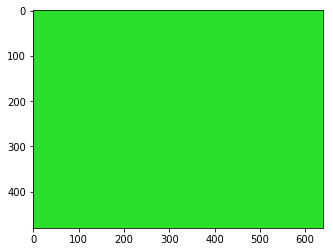

In [44]:
#GET AND SHOW IMAGE
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)
delete_object(model_name)


In [45]:
delete_object(model_name)
delete_object(model_name+str(1))
delete_object(model_name+str(2))
delete_object(model_name+str(3))


In [46]:
delete_object(model_name)


In [58]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

('current time:-', datetime.datetime(2021, 3, 28, 12, 35, 26, 738213))


レゴブロックが頭部カメラの画角に入るように頭を少し下げます。rviz上の頭部カメラの映像が変化することを確認しましょう。

Lower the head slightly so that the Lego block is within the viewing angle of the head camera. Check that the image in the head camera in RViz changes accordingly:

In [59]:
#Capture a frame each degdree while changing static object pose
#I dont love this way of spawining and  deleting, 
#CONTROL VIA ROS TOPIC POSE !
samples_rev=100
start = time.time()
model_name = objs[82]
D_to_cam=0.75

for j in range (3):
    deg=0
    
    for i in range (samples_rev):
        trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
        euler=tf.transformations.euler_from_quaternion(rot)
        deg+= np.deg2rad(i*2*np.pi/samples_rev)
        print(i,deg)
        x_gaz,y_gaz=world_2_gazebo(       trans[0]+ D_to_cam * np.cos(euler[2]),   trans[1]+ D_to_cam * np.sin(euler[2])    )
        z_gaz= trans[2]- D_to_cam*np.sin(euler[1])

        #spawn_object("lego2", model_name, x_gaz,  y_gaz, trans[2], 0.8)
        #spawn_object(model_name, model_name, x_gaz,  y_gaz, trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand() ,2*np.pi*np.random.rand(),2*np.pi*np.random.rand())
        spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, deg ,deg ,euler[2]+.4+.1*j*np.pi)
        
        cap_cnt= i
        rospy.sleep(.1)
        cv2_img = rgbd.get_image()

        cap_name = "/home/roboworks/Desktop/imagesfromlistener/"+model_name+"_"+str(j*30)+"deg""_{}.png".format(cap_cnt)   ##SAVE YOUR IMAGES WHEREVER YOU WAnt
        #cap_name = "imagesfromlistener/image_from_listener_{}.png".format(cap_cnt)
        im_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(cap_name, im_rgb)
        delete_object(model_name)
end = time.time()


    

(0, 0.0)
[INFO] [1616956526.772756, 974.702000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956526.775735, 974.702000]: Spawn: [ 0.         -0.52018269  0.          0.85405502]
[INFO] [1616956526.780816, 974.703000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956526.789994, 974.704000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956527.020689, 974.726000]: Spawn status: SpawnModel: Successfully spawned entity
(1, 0.001096622711232151)
[INFO] [1616956528.807862, 974.989000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956528.809872, 974.989000]: Spawn: [ 7.53509769e-04 -5.20181256e-01  7.53509769e-04  8.54055224e-01]
[INFO] [1616956528.811326, 974.989000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956528.814875, 974.989000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956528.904790, 974.997000]: Spawn status: SpawnModel: Successfully spawned entity
(2, 0.0032898681336964533)
[INFO] [1616956530.676483, 975.252000]: Spawn: ycb_072-d_toy_airplane
[I

(19, 0.20835831513410868)
[INFO] [1616956565.643544, 980.250000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956565.645607, 980.251000]: Spawn: [ 0.14213634 -0.50539694  0.14213634  0.83914746]
[INFO] [1616956565.646874, 980.251000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956565.653794, 980.252000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956565.715811, 980.257000]: Spawn status: SpawnModel: Successfully spawned entity
(20, 0.2302907693587517)
[INFO] [1616956568.013155, 980.597000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956568.016649, 980.598000]: Spawn: [ 0.15684547 -0.50211608  0.15684547  0.83586987]
[INFO] [1616956568.019848, 980.598000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956568.026723, 980.598000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956568.199589, 980.617000]: Spawn status: SpawnModel: Successfully spawned entity
(21, 0.2533198462946269)
[INFO] [1616956569.845135, 980.858000]: Spawn: ycb_072-d_toy_airplane
[INF

[INFO] [1616956603.141486, 985.441000]: Spawn status: SpawnModel: Successfully spawned entity
(38, 0.8125974290230237)
[INFO] [1616956604.979650, 985.723000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956604.983219, 985.723000]: Spawn: [ 0.49891646 -0.30564406  0.49891646  0.63933282]
[INFO] [1616956604.985349, 985.724000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956604.998635, 985.726000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956605.230186, 985.753000]: Spawn status: SpawnModel: Successfully spawned entity
(39, 0.8553657147610776)
[INFO] [1616956607.028402, 986.012000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956607.030634, 986.013000]: Spawn: [ 0.51866254 -0.2838867   0.51866254  0.61756512]
[INFO] [1616956607.032059, 986.013000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956607.051340, 986.015000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956607.104010, 986.018000]: Spawn status: SpawnModel: Successfully spawned entity
(40, 0

(57, 1.8127173416667453)
[INFO] [1616956642.256167, 991.071000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956642.258553, 991.071000]: Spawn: [0.66707898 0.33167034 0.66707898 0.0024619 ]
[INFO] [1616956642.260628, 991.071000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956642.286884, 991.073000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956642.544862, 991.106000]: Spawn status: SpawnModel: Successfully spawned entity
(58, 1.87632145891821)
[INFO] [1616956644.373311, 991.373000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956644.376488, 991.373000]: Spawn: [ 0.65526937  0.37373103  0.65526937 -0.03961354]
[INFO] [1616956644.395055, 991.378000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956644.400268, 991.379000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956644.624450, 991.407000]: Spawn status: SpawnModel: Successfully spawned entity
(59, 1.9410221988809069)
[INFO] [1616956646.467356, 991.668000]: Spawn: ycb_072-d_toy_airplane
[INFO] [161

[INFO] [1616956679.064786, 996.304000]: Spawn status: SpawnModel: Successfully spawned entity
(76, 3.2087180530652737)
[INFO] [1616956680.857052, 996.563000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956680.859041, 996.564000]: Spawn: [-0.04608741  0.85255828 -0.04608741 -0.5185521 ]
[INFO] [1616956680.863472, 996.565000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956680.867140, 996.565000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956680.949825, 996.573000]: Spawn status: SpawnModel: Successfully spawned entity
(77, 3.2931580018301494)
[INFO] [1616956682.798415, 996.843000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956682.801006, 996.843000]: Spawn: [-0.10374285  0.84622521 -0.10374285 -0.51222821]
[INFO] [1616956682.803591, 996.844000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956682.815116, 996.845000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956683.046697, 996.873000]: Spawn status: SpawnModel: Successfully spawned entity
(78, 3

(94, 4.896420405651554)
[INFO] [1616956716.988925, 1001.725000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956716.992054, 1001.726000]: Spawn: [-0.67551745  0.0411915  -0.67551745  0.29266979]
[INFO] [1616956716.993895, 1001.726000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956717.022368, 1001.731000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956717.209321, 1001.757000]: Spawn status: SpawnModel: Successfully spawned entity
(95, 5.000599563218609)
[INFO] [1616956719.023904, 1002.027000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956719.026496, 1002.027000]: Spawn: [-0.65878371 -0.02839485 -0.65878371  0.36221786]
[INFO] [1616956719.028206, 1002.027000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956719.033572, 1002.028000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956719.290217, 1002.061000]: Spawn status: SpawnModel: Successfully spawned entity
(96, 5.105875343496895)
[INFO] [1616956721.132594, 1002.331000]: Spawn: ycb_072-d_toy_airpla

(12, 0.08553657147610777)
[INFO] [1616956753.601328, 1006.973000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956753.610569, 1006.975000]: Spawn: [ 0.05575265 -0.37795798  0.05575265  0.92245924]
[INFO] [1616956753.613613, 1006.977000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956753.625790, 1006.979000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956753.885478, 1007.011000]: Spawn status: SpawnModel: Successfully spawned entity
(13, 0.09979266672212574)
[INFO] [1616956755.724042, 1007.281000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956755.726148, 1007.281000]: Spawn: [ 0.06501589 -0.37708964  0.06501589  0.92160147]
[INFO] [1616956755.727398, 1007.281000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956755.732028, 1007.282000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956755.964755, 1007.309000]: Spawn status: SpawnModel: Successfully spawned entity
(14, 0.11514538467937585)
[INFO] [1616956757.805350, 1007.566000]: Spawn: ycb_072-d_toy_

(30, 0.5099295607229501)
[INFO] [1616956790.827888, 1012.244000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956790.830376, 1012.245000]: Spawn: [ 0.31855247 -0.29739245  0.31855247  0.84178761]
[INFO] [1616956790.831888, 1012.245000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956790.845742, 1012.247000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956791.074789, 1012.272000]: Spawn status: SpawnModel: Successfully spawned entity
(31, 0.5439248647711468)
[INFO] [1616956792.861397, 1012.530000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956792.863376, 1012.530000]: Spawn: [ 0.3377249  -0.28621618  0.3377249   0.83064077]
[INFO] [1616956792.865539, 1012.531000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956792.890360, 1012.535000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956792.942293, 1012.537000]: Spawn status: SpawnModel: Successfully spawned entity
(32, 0.5790167915305756)
[INFO] [1616956794.749660, 1012.808000]: Spawn: ycb_072-d_toy_air

[INFO] [1616956827.817518, 1017.546000]: Spawn status: SpawnModel: Successfully spawned entity
(49, 1.3433628212593847)
[INFO] [1616956829.666149, 1017.817000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956829.668894, 1017.817000]: Spawn: [0.63585789 0.12491974 0.63585789 0.41924282]
[INFO] [1616956829.670344, 1017.817000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956829.674309, 1017.818000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956829.904102, 1017.847000]: Spawn status: SpawnModel: Successfully spawned entity
(50, 1.3981939568209922)
[INFO] [1616956831.723857, 1018.108000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956831.726079, 1018.109000]: Spawn: [0.64296644 0.15999044 0.64296644 0.38417622]
[INFO] [1616956831.727496, 1018.109000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956831.733494, 1018.109000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956831.997539, 1018.140000]: Spawn status: SpawnModel: Successfully spawned entity
(51

(67, 2.4981065361868398)
[INFO] [1616956865.382257, 1022.925000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956865.384812, 1022.925000]: Spawn: [ 0.3916107   0.79416744  0.3916107  -0.25016037]
[INFO] [1616956865.386371, 1022.925000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956865.389692, 1022.926000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956865.626688, 1022.955000]: Spawn status: SpawnModel: Successfully spawned entity
(68, 2.572676880550626)
[INFO] [1616956867.455310, 1023.221000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956867.457718, 1023.221000]: Spawn: [ 0.35162049  0.82189185  0.35162049 -0.2778846 ]
[INFO] [1616956867.459224, 1023.221000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956867.464005, 1023.222000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956867.537542, 1023.225000]: Spawn status: SpawnModel: Successfully spawned entity
(69, 2.6483438476256445)
[INFO] [1616956869.368477, 1023.494000]: Spawn: ycb_072-d_toy_airp

[INFO] [1616956901.508788, 1028.109000]: Spawn status: SpawnModel: Successfully spawned entity
(86, 4.102465562719477)
[INFO] [1616956903.358300, 1028.376000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956903.361510, 1028.377000]: Spawn: [-0.53503727  0.6458129  -0.53503727 -0.10196041]
[INFO] [1616956903.363072, 1028.377000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956903.377465, 1028.379000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956903.607393, 1028.408000]: Spawn status: SpawnModel: Successfully spawned entity
(87, 4.197871738596674)
[INFO] [1616956905.392266, 1028.660000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956905.395151, 1028.660000]: Spawn: [-0.56822148  0.59314324 -0.56822148 -0.04929295]
[INFO] [1616956905.397266, 1028.661000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956905.402035, 1028.661000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956905.487381, 1028.667000]: Spawn status: SpawnModel: Successfully spawned enti

(4, 0.01096622711232151)
[INFO] [1616956938.669449, 1033.457000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956938.673228, 1033.458000]: Spawn: [ 0.0066042  -0.23166104  0.0066042   0.97275173]
[INFO] [1616956938.674604, 1033.458000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956938.681348, 1033.459000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956938.897049, 1033.487000]: Spawn status: SpawnModel: Successfully spawned entity
(5, 0.016449340668482262)
[INFO] [1616956940.739277, 1033.760000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956940.741714, 1033.760000]: Spawn: [ 0.00990545 -0.23152074  0.00990545  0.9727291 ]
[INFO] [1616956940.743743, 1033.761000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956940.750477, 1033.761000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956940.975239, 1033.789000]: Spawn status: SpawnModel: Successfully spawned entity
(6, 0.023029076935875168)
[INFO] [1616956942.805132, 1034.058000]: Spawn: ycb_072-d_toy_a

(22, 0.2774455459417342)
[INFO] [1616956975.325235, 1038.763000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956975.329017, 1038.764000]: Spawn: [ 0.16496167 -0.20873781  0.16496167  0.94973882]
[INFO] [1616956975.331659, 1038.765000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956975.335682, 1038.765000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956975.558261, 1038.794000]: Spawn status: SpawnModel: Successfully spawned entity
(23, 0.3026678683000737)
[INFO] [1616956977.366357, 1039.059000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616956977.369057, 1039.059000]: Spawn: [ 0.17951829 -0.20440108  0.17951829  0.94539228]
[INFO] [1616956977.370466, 1039.060000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956977.374073, 1039.060000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956977.448270, 1039.064000]: Spawn status: SpawnModel: Successfully spawned entity
(24, 0.3289868133696453)
[INFO] [1616956979.241840, 1039.322000]: Spawn: ycb_072-d_toy_air

[INFO] [1616957012.514534, 1044.058000]: Spawn status: SpawnModel: Successfully spawned entity
(41, 0.9441921543708818)
[INFO] [1616957014.305092, 1044.310000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957014.307493, 1044.310000]: Spawn: [0.4879     0.01720242 0.4879     0.72360988]
[INFO] [1616957014.317725, 1044.313000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957014.330765, 1044.315000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957014.594461, 1044.351000]: Spawn status: SpawnModel: Successfully spawned entity
(42, 0.9902503082426322)
[INFO] [1616957016.409149, 1044.621000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957016.412091, 1044.622000]: Spawn: [0.50365008 0.04002696 0.50365008 0.70076461]
[INFO] [1616957016.414645, 1044.622000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957016.418914, 1044.622000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957016.672926, 1044.658000]: Spawn status: SpawnModel: Successfully spawned entity
(43

(59, 1.9410221988809069)
[INFO] [1616957050.626858, 1049.607000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957050.629997, 1049.608000]: Spawn: [0.56160569 0.58822501 0.56160569 0.1522808 ]
[INFO] [1616957050.631285, 1049.608000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957050.654561, 1049.610000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957050.876708, 1049.631000]: Spawn status: SpawnModel: Successfully spawned entity
(60, 2.006819561554836)
[INFO] [1616957052.681320, 1049.895000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957052.683847, 1049.896000]: Spawn: [0.54606644 0.62466871 0.54606644 0.11580968]
[INFO] [1616957052.685248, 1049.896000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957052.694003, 1049.897000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957052.743537, 1049.899000]: Spawn status: SpawnModel: Successfully spawned entity
(61, 2.0737135469399974)
[INFO] [1616957054.534224, 1050.169000]: Spawn: ycb_072-d_toy_airplane
[IN

(78, 3.378694573306257)
[INFO] [1616957088.028116, 1054.935000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957088.030365, 1054.935000]: Spawn: [-0.14151113  0.95579287 -0.14151113 -0.2154279 ]
[INFO] [1616957088.031972, 1054.935000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957088.049509, 1054.939000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957088.313570, 1054.970000]: Spawn status: SpawnModel: Successfully spawned entity
(79, 3.465327767493597)
[INFO] [1616957090.176214, 1055.243000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957090.178509, 1055.243000]: Spawn: [-0.19165053  0.9413519  -0.19165053 -0.20098943]
[INFO] [1616957090.180053, 1055.243000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957090.208763, 1055.247000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957090.426432, 1055.271000]: Spawn status: SpawnModel: Successfully spawned entity
(80, 3.5530575843921692)
[INFO] [1616957092.235438, 1055.532000]: Spawn: ycb_072-d_toy_airpl

(97, 5.212247746486414)
[INFO] [1616957125.521755, 1060.209000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957125.528791, 1060.213000]: Spawn: [-0.52877371  0.08137284 -0.52877371  0.65891971]
[INFO] [1616957125.530530, 1060.213000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957125.533012, 1060.213000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957125.764657, 1060.244000]: Spawn status: SpawnModel: Successfully spawned entity
(98, 5.3197167721871645)
[INFO] [1616957127.561465, 1060.509000]: Spawn: ycb_072-d_toy_airplane
[INFO] [1616957127.564040, 1060.509000]: Spawn: [-0.49474989  0.0263179  -0.49474989  0.71396951]
[INFO] [1616957127.565788, 1060.509000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957127.578383, 1060.510000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957127.846410, 1060.544000]: Spawn status: SpawnModel: Successfully spawned entity
(99, 5.428282420599148)
[INFO] [1616957129.647529, 1060.811000]: Spawn: ycb_072-d_toy_airpl

In [60]:
print( 'time elapsed in trainSing video',(end - start)/60,'mins')

ct = datetime.datetime.now()
print("current time:-", ct)

('time elapsed in trainSing video', 10.08344560066859, 'mins')
('current time:-', datetime.datetime(2021, 3, 28, 12, 45, 31, 798339))


In [61]:
#Capture a frame each degdree while changing static object pose
#I dont love this way of spawining and  deleting, 
#CONTROL VIA ROS TOPIC POSE !
samples_rev=100
start = time.time()
model_name = objs[83]
D_to_cam=0.75

for j in range (3):
    deg=0
    
    for i in range (samples_rev):
        trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
        euler=tf.transformations.euler_from_quaternion(rot)
        deg+= np.deg2rad(i*2*np.pi/samples_rev)
        print(i,deg)
        x_gaz,y_gaz=world_2_gazebo(       trans[0]+ D_to_cam * np.cos(euler[2]),   trans[1]+ D_to_cam * np.sin(euler[2])    )
        z_gaz= trans[2]- D_to_cam*np.sin(euler[1])

        #spawn_object("lego2", model_name, x_gaz,  y_gaz, trans[2], 0.8)
        #spawn_object(model_name, model_name, x_gaz,  y_gaz, trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand() ,2*np.pi*np.random.rand(),2*np.pi*np.random.rand())
        spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, deg ,deg ,euler[2]+.4+.1*j*np.pi)
        
        cap_cnt= i
        rospy.sleep(.1)
        cv2_img = rgbd.get_image()

        cap_name = "/home/roboworks/Desktop/images2/"+model_name+"_"+str(j*30)+"deg""_{}.png".format(cap_cnt)   ##SAVE YOUR IMAGES WHEREVER YOU WAnt
        #cap_name = "imagesfromlistener/image_from_listener_{}.png".format(cap_cnt)
        im_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(cap_name, im_rgb)
        delete_object(model_name)
end = time.time()


    

(0, 0.0)
[INFO] [1616957131.849548, 1061.136000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957131.852249, 1061.136000]: Spawn: [ 0.         -0.52153795  0.          0.85322808]
[INFO] [1616957131.855524, 1061.137000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957131.859765, 1061.137000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957132.011003, 1061.149000]: Spawn status: SpawnModel: Successfully spawned entity
(1, 0.001096622711232151)
[INFO] [1616957133.863143, 1061.434000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957133.866134, 1061.435000]: Spawn: [ 7.53795535e-04 -5.21518102e-01  7.53795535e-04  8.53239552e-01]
[INFO] [1616957133.868373, 1061.435000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957133.872284, 1061.436000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957134.102820, 1061.466000]: Spawn status: SpawnModel: Successfully spawned entity
(2, 0.0032898681336964533)
[INFO] [1616957135.909815, 1061.726000]: Spawn: ycb_072-e_toy_

(18, 0.18752248362069782)
[INFO] [1616957169.040208, 1066.556000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957169.042510, 1066.557000]: Spawn: [ 0.12815068 -0.5096261   0.12815068  0.84109217]
[INFO] [1616957169.044079, 1066.557000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957169.047288, 1066.557000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957169.103667, 1066.561000]: Spawn status: SpawnModel: Successfully spawned entity
(19, 0.20835831513410868)
[INFO] [1616957170.916861, 1066.834000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957170.919196, 1066.834000]: Spawn: [ 0.14219428 -0.50682853  0.14219428  0.83826393]
[INFO] [1616957170.921186, 1066.835000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957170.931212, 1066.836000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957171.204299, 1066.867000]: Spawn status: SpawnModel: Successfully spawned entity
(20, 0.2302907693587517)
[INFO] [1616957172.994637, 1067.140000]: Spawn: ycb_072-e_toy_a

[INFO] [1616957205.254596, 1071.859000]: Spawn status: SpawnModel: Successfully spawned entity
(37, 0.770925765996202)
[INFO] [1616957207.047294, 1072.127000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957207.049507, 1072.127000]: Spawn: [ 0.47920709 -0.32886481  0.47920709  0.65769983]
[INFO] [1616957207.051621, 1072.128000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957207.055904, 1072.128000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957207.131490, 1072.135000]: Spawn status: SpawnModel: Successfully spawned entity
(38, 0.8125974290230237)
[INFO] [1616957208.963464, 1072.404000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957208.967448, 1072.405000]: Spawn: [ 0.49935295 -0.3085531   0.49935295  0.63725053]
[INFO] [1616957208.969001, 1072.405000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957208.985543, 1072.408000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957209.214984, 1072.435000]: Spawn status: SpawnModel: Successfully spawned ent

(55, 1.688798975297512)
[INFO] [1616957243.445995, 1077.389000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957243.448625, 1077.389000]: Spawn: [0.68350891 0.2430488  0.68350891 0.08098415]
[INFO] [1616957243.450892, 1077.390000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957243.460461, 1077.391000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957243.517074, 1077.394000]: Spawn status: SpawnModel: Successfully spawned entity
(56, 1.7502098471265126)
[INFO] [1616957245.297245, 1077.648000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957245.299392, 1077.648000]: Spawn: [0.67728301 0.28469683 0.67728301 0.03902774]
[INFO] [1616957245.300852, 1077.648000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957245.318280, 1077.651000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957245.383305, 1077.655000]: Spawn status: SpawnModel: Successfully spawned entity
(57, 1.8127173416667453)
[INFO] [1616957247.206837, 1077.926000]: Spawn: ycb_072-e_toy_airplane
[IN

(74, 3.043128023669219)
[INFO] [1616957281.870901, 1082.875000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957281.873482, 1082.875000]: Spawn: [ 0.06774441  0.84425314  0.06774441 -0.52731208]
[INFO] [1616957281.875949, 1082.876000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957281.889888, 1082.877000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957282.166663, 1082.907000]: Spawn status: SpawnModel: Successfully spawned entity
(75, 3.1253747270116303)
[INFO] [1616957283.986224, 1083.173000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957283.988835, 1083.174000]: Spawn: [ 0.01117598  0.8474254   0.01117598 -0.53067917]
[INFO] [1616957283.990467, 1083.174000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957283.998736, 1083.175000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957284.061826, 1083.177000]: Spawn status: SpawnModel: Successfully spawned entity
(76, 3.2087180530652737)
[INFO] [1616957285.874210, 1083.445000]: Spawn: ycb_072-e_toy_airp

[INFO] [1616957318.559254, 1088.064000]: Spawn status: SpawnModel: Successfully spawned entity
(93, 4.793337870795732)
[INFO] [1616957320.841754, 1088.402000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957320.844087, 1088.402000]: Spawn: [-0.68799411  0.09764208 -0.68799411  0.20927073]
[INFO] [1616957320.845916, 1088.402000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957320.849500, 1088.403000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957321.036850, 1088.425000]: Spawn status: SpawnModel: Successfully spawned entity
(94, 4.896420405651554)
[INFO] [1616957322.849248, 1088.681000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957322.851868, 1088.682000]: Spawn: [-0.6786564   0.02686889 -0.6786564   0.27951574]
[INFO] [1616957322.853061, 1088.682000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957322.862016, 1088.683000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957323.122161, 1088.717000]: Spawn status: SpawnModel: Successfully spawned enti

(11, 0.07237709894132197)
[INFO] [1616957357.125185, 1093.514000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957357.128031, 1093.514000]: Spawn: [ 0.04770959 -0.40362543  0.04770959  0.91243307]
[INFO] [1616957357.130315, 1093.514000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957357.151047, 1093.517000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957357.405343, 1093.549000]: Spawn status: SpawnModel: Successfully spawned entity
(12, 0.08553657147610777)
[INFO] [1616957359.218234, 1093.805000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957359.220621, 1093.805000]: Spawn: [ 0.05637429 -0.40335117  0.05637429  0.91156553]
[INFO] [1616957359.222321, 1093.805000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957359.229729, 1093.806000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957359.298011, 1093.808000]: Spawn status: SpawnModel: Successfully spawned entity
(13, 0.09979266672212574)
[INFO] [1616957361.115671, 1094.075000]: Spawn: ycb_072-e_toy_

(29, 0.47703087938598565)
[INFO] [1616957393.649869, 1098.588000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957393.652030, 1098.589000]: Spawn: [ 0.30412473 -0.34091886  0.30412473  0.83593697]
[INFO] [1616957393.653655, 1098.589000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957393.670070, 1098.591000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957393.891900, 1098.615000]: Spawn status: SpawnModel: Successfully spawned entity
(30, 0.5099295607229501)
[INFO] [1616957395.750081, 1098.880000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957395.753799, 1098.881000]: Spawn: [ 0.32339767 -0.33119724  0.32339767  0.82530981]
[INFO] [1616957395.755509, 1098.881000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957395.769257, 1098.883000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957396.005109, 1098.908000]: Spawn status: SpawnModel: Successfully spawned entity
(31, 0.5439248647711468)
[INFO] [1616957397.817668, 1099.165000]: Spawn: ycb_072-e_toy_ai

[INFO] [1616957432.165486, 1104.012000]: Spawn status: SpawnModel: Successfully spawned entity
(48, 1.2896283084090092)
[INFO] [1616957434.463558, 1104.343000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957434.465406, 1104.343000]: Spawn: [0.63959514 0.05358709 0.63959514 0.42304199]
[INFO] [1616957434.467072, 1104.343000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957434.481808, 1104.344000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957434.658962, 1104.365000]: Spawn status: SpawnModel: Successfully spawned entity
(49, 1.3433628212593847)
[INFO] [1616957436.460539, 1104.621000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957436.462829, 1104.621000]: Spawn: [0.64879659 0.0875752  0.64879659 0.38788729]
[INFO] [1616957436.464983, 1104.622000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957436.467737, 1104.622000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957436.532541, 1104.625000]: Spawn status: SpawnModel: Successfully spawned entity
(50

(66, 2.4246328145342857)
[INFO] [1616957471.188841, 1109.515000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957471.193422, 1109.516000]: Spawn: [ 0.43970904  0.73292301  0.43970904 -0.27592712]
[INFO] [1616957471.195580, 1109.516000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957471.217911, 1109.518000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957471.410923, 1109.543000]: Spawn status: SpawnModel: Successfully spawned entity
(67, 2.4981065361868398)
[INFO] [1616957473.238763, 1109.810000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957473.241557, 1109.811000]: Spawn: [ 0.40158717  0.76350928  0.40158717 -0.30742327]
[INFO] [1616957473.243691, 1109.811000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957473.258584, 1109.812000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957473.490509, 1109.838000]: Spawn status: SpawnModel: Successfully spawned entity
(68, 2.572676880550626)
[INFO] [1616957475.345291, 1110.094000]: Spawn: ycb_072-e_toy_airp

(85, 4.008156009553512)
[INFO] [1616957509.520978, 1114.840000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957509.522911, 1114.841000]: Spawn: [-0.51253425  0.65386103 -0.51253425 -0.21698628]
[INFO] [1616957509.524500, 1114.841000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957509.527964, 1114.842000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957509.713425, 1114.862000]: Spawn status: SpawnModel: Successfully spawned entity
(86, 4.102465562719477)
[INFO] [1616957511.550970, 1115.118000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957511.553582, 1115.118000]: Spawn: [-0.55140527  0.60321713 -0.55140527 -0.16743224]
[INFO] [1616957511.557046, 1115.119000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957511.564542, 1115.119000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957511.807440, 1115.148000]: Spawn status: SpawnModel: Successfully spawned entity
(87, 4.197871738596674)
[INFO] [1616957513.672435, 1115.425000]: Spawn: ycb_072-e_toy_airpla

(4, 0.01096622711232151)
[INFO] [1616957547.670752, 1120.084000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957547.672980, 1120.084000]: Spawn: [ 0.00696524 -0.3243819   0.00696524  0.94587491]
[INFO] [1616957547.674387, 1120.085000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957547.677408, 1120.085000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957547.931528, 1120.112000]: Spawn status: SpawnModel: Successfully spawned entity
(5, 0.016449340668482262)
[INFO] [1616957549.729194, 1120.370000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957549.731520, 1120.370000]: Spawn: [ 0.0104533  -0.32539054  0.0104533   0.94546415]
[INFO] [1616957549.733058, 1120.370000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957549.737541, 1120.371000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957549.817278, 1120.374000]: Spawn status: SpawnModel: Successfully spawned entity
(6, 0.023029076935875168)
[INFO] [1616957551.629407, 1120.634000]: Spawn: ycb_072-e_toy_a

(22, 0.2774455459417342)
[INFO] [1616957585.050128, 1125.284000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957585.052310, 1125.284000]: Spawn: [ 0.17543714 -0.3164559   0.17543714  0.91558685]
[INFO] [1616957585.053748, 1125.284000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957585.061787, 1125.285000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957585.146567, 1125.291000]: Spawn status: SpawnModel: Successfully spawned entity
(23, 0.3026678683000737)
[INFO] [1616957587.024838, 1125.561000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957587.027453, 1125.561000]: Spawn: [ 0.19101028 -0.31280239  0.19101028  0.91059585]
[INFO] [1616957587.029650, 1125.562000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957587.041853, 1125.564000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957587.230274, 1125.591000]: Spawn status: SpawnModel: Successfully spawned entity
(24, 0.3289868133696453)
[INFO] [1616957589.056122, 1125.843000]: Spawn: ycb_072-e_toy_air

(41, 0.9441921543708818)
[INFO] [1616957623.678595, 1130.589000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957623.681706, 1130.589000]: Spawn: [ 0.52332918 -0.09145343  0.52332918  0.66625027]
[INFO] [1616957623.683325, 1130.590000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957623.697913, 1130.592000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957623.742862, 1130.593000]: Spawn status: SpawnModel: Successfully spawned entity
(42, 0.9902503082426322)
[INFO] [1616957625.587587, 1130.844000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957625.598204, 1130.846000]: Spawn: [ 0.54048389 -0.06784948  0.54048389  0.64121039]
[INFO] [1616957625.600511, 1130.846000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957625.610822, 1130.847000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957625.848872, 1130.870000]: Spawn status: SpawnModel: Successfully spawned entity
(43, 1.0374050848256147)
[INFO] [1616957627.664241, 1131.126000]: Spawn: ycb_072-e_toy_air

(60, 2.006819561554836)
[INFO] [1616957663.557914, 1136.002000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957663.560074, 1136.002000]: Spawn: [ 0.59087115  0.54930946  0.59087115 -0.00130142]
[INFO] [1616957663.561943, 1136.002000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957663.568215, 1136.003000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957663.814842, 1136.026000]: Spawn status: SpawnModel: Successfully spawned entity
(61, 2.0737135469399974)
[INFO] [1616957665.639778, 1136.280000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957665.642389, 1136.280000]: Spawn: [ 0.57143064  0.58757476  0.57143064 -0.04110912]
[INFO] [1616957665.652330, 1136.286000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957665.661650, 1136.287000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957665.901731, 1136.313000]: Spawn status: SpawnModel: Successfully spawned entity
(62, 2.1417041550363907)
[INFO] [1616957667.710696, 1136.566000]: Spawn: ycb_072-e_toy_airp

(79, 3.465327767493597)
[INFO] [1616957702.132072, 1141.224000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957702.134370, 1141.224000]: Spawn: [-0.20907117  0.88395179 -0.20907117 -0.36222606]
[INFO] [1616957702.136725, 1141.225000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957702.139946, 1141.226000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957702.201560, 1141.229000]: Spawn status: SpawnModel: Successfully spawned entity
(80, 3.5530575843921692)
[INFO] [1616957704.009716, 1141.487000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957704.013723, 1141.488000]: Spawn: [-0.26294433  0.86290074 -0.26294433 -0.3422322 ]
[INFO] [1616957704.015754, 1141.488000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957704.020715, 1141.489000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957704.084459, 1141.492000]: Spawn status: SpawnModel: Successfully spawned entity
(81, 3.6418840240019734)
[INFO] [1616957705.897497, 1141.744000]: Spawn: ycb_072-e_toy_airp

(98, 5.3197167721871645)
[INFO] [1616957740.337921, 1145.985000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957740.341793, 1145.986000]: Spawn: [-0.54375047 -0.12979984 -0.54375047  0.62595755]
[INFO] [1616957740.343213, 1145.986000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957740.347690, 1145.987000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957740.446049, 1145.992000]: Spawn status: SpawnModel: Successfully spawned entity
(99, 5.428282420599148)
[INFO] [1616957742.479472, 1146.237000]: Spawn: ycb_072-e_toy_airplane
[INFO] [1616957742.481738, 1146.237000]: Spawn: [-0.49983702 -0.18751576 -0.49983702  0.68202913]
[INFO] [1616957742.483286, 1146.237000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616957742.489681, 1146.238000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616957742.553798, 1146.240000]: Spawn status: SpawnModel: Successfully spawned entity


In [62]:
print( 'time elapsed in training video',(end - start)/60,'mins')
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

('time elapsed in training video', 10.212196818987529, 'mins')
('current time:-', datetime.datetime(2021, 3, 28, 12, 55, 44, 590188))


In [56]:
#Capture a frame each degdree while changing static object pose
#I dont love this way of spawining and  deleting, 
#CONTROL VIA ROS TOPIC POSE !
samples_rev=100
start = time.time()
model_name=objs[81]
D_to_cam=.75
for j in range (3):
    deg=0
    
    for i in range (samples_rev):
        trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
        euler=tf.transformations.euler_from_quaternion(rot)
        deg+= np.deg2rad(i*2*np.pi/samples_rev)
        print(i,deg)
        x_gaz,y_gaz=world_2_gazebo(       trans[0]+ D_to_cam * np.cos(euler[2]),   trans[1]+ D_to_cam * np.sin(euler[2])    )
        z_gaz= trans[2]- D_to_cam*np.sin(euler[1])

        #spawn_object("lego2", model_name, x_gaz,  y_gaz, trans[2], 0.8)
        #spawn_object(model_name, model_name, x_gaz,  y_gaz, trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand() ,2*np.pi*np.random.rand(),2*np.pi*np.random.rand())
        spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, +.4+.1*j*np.pi, 0 ,deg)
        
        cap_cnt= i
        rospy.sleep(.1)
        cv2_img = rgbd.get_image()

        cap_name = "/home/roboworks/Desktop/images3/"+model_name+"_"+str(j*30)+"deg""_{}.png".format(cap_cnt)   ##SAVE YOUR IMAGES WHEREVER YOU WAnt
        #cap_name = "imagesfromlistener/image_from_listener_{}.png".format(cap_cnt)
        im_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(cap_name, im_rgb)
        delete_object(model_name)
end = time.time()


    

(0, 0.0)
[INFO] [1616955924.579480, 890.209000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616955924.584049, 890.210000]: Spawn: [0.         0.         0.19866933 0.98006658]
[INFO] [1616955924.588646, 890.210000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616955924.595237, 890.211000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616955924.738228, 890.229000]: Spawn status: SpawnModel: Successfully spawned entity
(1, 0.001096622711232151)
[INFO] [1616955926.800200, 890.507000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616955926.802503, 890.508000]: Spawn: [-1.08932645e-04  5.37381607e-04  1.98669301e-01  9.80066431e-01]
[INFO] [1616955926.805358, 890.508000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616955926.810502, 890.509000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616955927.022678, 890.531000]: Spawn status: SpawnModel: Successfully spawned entity
(2, 0.0032898681336964533)
[INFO] [1616955928.882219, 890.806000]: Spawn: ycb_072-c_toy_airplane
[INFO]

(19, 0.20835831513410868)
[INFO] [1616955963.222310, 895.629000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616955963.224792, 895.629000]: Spawn: [-0.02065979  0.10191792  0.1975922   0.97475291]
[INFO] [1616955963.226339, 895.629000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616955963.237875, 895.631000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616955963.304908, 895.635000]: Spawn status: SpawnModel: Successfully spawned entity
(20, 0.2302907693587517)
[INFO] [1616955965.361273, 895.938000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616955965.364412, 895.938000]: Spawn: [-0.02282534  0.11260094  0.19735376  0.97357667]
[INFO] [1616955965.366151, 895.938000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616955965.389551, 895.944000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616955965.603688, 895.967000]: Spawn status: SpawnModel: Successfully spawned entity
(21, 0.2533198462946269)
[INFO] [1616955967.385222, 896.233000]: Spawn: ycb_072-c_toy_airplane
[INF

[INFO] [1616955999.946094, 900.706000]: Spawn status: SpawnModel: Successfully spawned entity
(38, 0.8125974290230237)
[INFO] [1616956001.788885, 900.979000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956001.791029, 900.979000]: Spawn: [-0.07851652  0.38733415  0.18249564  0.90027926]
[INFO] [1616956001.792447, 900.979000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956001.796837, 900.980000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956002.047861, 901.009000]: Spawn status: SpawnModel: Successfully spawned entity
(39, 0.8553657147610776)
[INFO] [1616956003.861069, 901.272000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956003.867878, 901.272000]: Spawn: [-0.08240078  0.40649583  0.18077504  0.89179125]
[INFO] [1616956003.869496, 901.272000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956003.878822, 901.274000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956003.928713, 901.276000]: Spawn status: SpawnModel: Successfully spawned entity
(40, 0

(57, 1.8127173416667453)
[INFO] [1616956041.494269, 906.180000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956041.496520, 906.180000]: Spawn: [-0.15640514  0.7715708   0.12250279  0.60432524]
[INFO] [1616956041.498513, 906.181000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956041.517833, 906.183000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956041.731506, 906.209000]: Spawn status: SpawnModel: Successfully spawned entity
(58, 1.87632145891821)
[INFO] [1616956043.560339, 906.459000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956043.562965, 906.460000]: Spawn: [-0.16022124  0.79039621  0.11746768  0.57948626]
[INFO] [1616956043.564486, 906.460000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956043.567931, 906.460000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956043.625252, 906.463000]: Spawn status: SpawnModel: Successfully spawned entity
(59, 1.9410221988809069)
[INFO] [1616956045.631949, 906.742000]: Spawn: ycb_072-c_toy_airplane
[INFO] 

[INFO] [1616956077.642224, 911.357000]: Spawn status: SpawnModel: Successfully spawned entity
(76, 3.2087180530652737)
[INFO] [1616956079.433641, 911.617000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956079.437196, 911.618000]: Spawn: [-0.19855745  0.97951463 -0.00666663 -0.03288751]
[INFO] [1616956079.438432, 911.618000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956079.443136, 911.618000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956079.511851, 911.623000]: Spawn status: SpawnModel: Successfully spawned entity
(77, 3.2931580018301494)
[INFO] [1616956081.312493, 911.888000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956081.315005, 911.888000]: Spawn: [-0.19809912  0.97725366 -0.01504129 -0.074201  ]
[INFO] [1616956081.316766, 911.889000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956081.318952, 911.889000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956081.420959, 911.897000]: Spawn status: SpawnModel: Successfully spawned entity
(78, 3

(95, 5.000599563218609)
[INFO] [1616956117.235807, 916.992000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956117.238785, 916.992000]: Spawn: [-0.11885034  0.58630714 -0.1591983  -0.78534988]
[INFO] [1616956117.240595, 916.992000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956117.243873, 916.993000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956117.308851, 916.998000]: Spawn status: SpawnModel: Successfully spawned entity
(96, 5.105875343496895)
[INFO] [1616956119.089408, 917.243000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956119.092859, 917.244000]: Spawn: [-0.11030973  0.544175   -0.16523095 -0.81510985]
[INFO] [1616956119.095888, 917.244000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956119.106766, 917.246000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956119.172915, 917.251000]: Spawn status: SpawnModel: Successfully spawned entity
(97, 5.212247746486414)
[INFO] [1616956120.676011, 917.474000]: Spawn: ycb_072-c_toy_airplane
[INFO] [

[INFO] [1616956153.118164, 922.118000]: Spawn status: SpawnModel: Successfully spawned entity
(14, 0.11514538467937585)
[INFO] [1616956154.960882, 922.392000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956154.963641, 922.393000]: Spawn: [-0.02011282  0.05391131  0.34896044  0.93536926]
[INFO] [1616956154.965320, 922.393000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956154.970364, 922.393000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956155.194425, 922.421000]: Spawn status: SpawnModel: Successfully spawned entity
(15, 0.1315947253478581)
[INFO] [1616956156.994651, 922.680000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956156.997397, 922.680000]: Spawn: [-0.02298219  0.0616025   0.34878322  0.93489423]
[INFO] [1616956156.999107, 922.681000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956157.001632, 922.681000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956157.055665, 922.684000]: Spawn status: SpawnModel: Successfully spawned entity
(16, 

(32, 0.5790167915305756)
[INFO] [1616956190.389343, 927.396000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956190.391649, 927.396000]: Spawn: [-0.09978695  0.26747342  0.33499325  0.89793099]
[INFO] [1616956190.393235, 927.396000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956190.396674, 927.397000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956190.617950, 927.424000]: Spawn status: SpawnModel: Successfully spawned entity
(33, 0.6152053410012366)
[INFO] [1616956192.416547, 927.680000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956192.418503, 927.680000]: Spawn: [-0.10583174  0.28367616  0.33313294  0.89294452]
[INFO] [1616956192.419694, 927.680000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956192.423465, 927.681000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956192.499843, 927.687000]: Spawn status: SpawnModel: Successfully spawned entity
(34, 0.6524905131831297)
[INFO] [1616956194.305979, 927.933000]: Spawn: ycb_072-c_toy_airplane
[INFO

(51, 1.454121715093832)
[INFO] [1616956228.714405, 932.824000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956228.717513, 932.824000]: Spawn: [-0.23233077  0.62274985  0.26115192  0.70000337]
[INFO] [1616956228.719255, 932.825000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956228.745309, 932.829000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956228.989501, 932.857000]: Spawn status: SpawnModel: Successfully spawned entity
(52, 1.5111460960779037)
[INFO] [1616956230.794379, 933.107000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956230.797158, 933.107000]: Spawn: [-0.23968134  0.64245266  0.25442242  0.6819653 ]
[INFO] [1616956230.799354, 933.108000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956230.808609, 933.109000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956230.873951, 933.113000]: Spawn status: SpawnModel: Successfully spawned entity
(53, 1.5692670997732077)
[INFO] [1616956232.712491, 933.374000]: Spawn: ycb_072-c_toy_airplane
[INFO]

(70, 2.725107437411895)
[INFO] [1616956266.408118, 938.185000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956266.412359, 938.186000]: Spawn: [-0.34198803  0.91668011  0.07226409  0.19369992]
[INFO] [1616956266.413787, 938.186000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956266.417983, 938.186000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956266.496318, 938.194000]: Spawn status: SpawnModel: Successfully spawned entity
(71, 2.8029676499093776)
[INFO] [1616956268.310153, 938.462000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956268.312624, 938.463000]: Spawn: [-0.34454145  0.92352442  0.05889907  0.15787571]
[INFO] [1616956268.314176, 938.463000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956268.322338, 938.464000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956268.390603, 938.467000]: Spawn status: SpawnModel: Successfully spawned entity
(72, 2.8819244851180925)
[INFO] [1616956270.173838, 938.715000]: Spawn: ycb_072-c_toy_airplane
[INFO]

[INFO] [1616956301.524399, 943.198000]: Spawn status: SpawnModel: Successfully spawned entity
(89, 4.391973958484765)
[INFO] [1616956303.297792, 943.451000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956303.302873, 943.453000]: Spawn: [-0.28342471  0.75970434 -0.20456869 -0.54833512]
[INFO] [1616956303.304738, 943.453000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956303.308051, 943.454000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956303.398837, 943.461000]: Spawn status: SpawnModel: Successfully spawned entity
(90, 4.4906700024956585)
[INFO] [1616956305.179853, 943.714000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956305.183789, 943.714000]: Spawn: [-0.27298871  0.73173123 -0.21830043 -0.58514229]
[INFO] [1616956305.185601, 943.715000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956305.205699, 943.717000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956305.270956, 943.722000]: Spawn status: SpawnModel: Successfully spawned entity
(91, 4.

(7, 0.030705435914500225)
[INFO] [1616956339.863777, 948.648000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956339.866434, 948.649000]: Spawn: [-0.00755022  0.01336719  0.49174503  0.87060389]
[INFO] [1616956339.867673, 948.649000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956339.872529, 948.650000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956340.104586, 948.681000]: Spawn status: SpawnModel: Successfully spawned entity
(8, 0.039478417604357434)
[INFO] [1616956341.943376, 948.942000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956341.946563, 948.942000]: Spawn: [-0.00970717  0.01718594  0.49170718  0.87053688]
[INFO] [1616956341.947977, 948.943000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956341.955501, 948.943000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956342.198535, 948.977000]: Spawn status: SpawnModel: Successfully spawned entity
(9, 0.049348022005446794)
[INFO] [1616956344.215478, 949.252000]: Spawn: ycb_072-c_toy_airplane
[I

(26, 0.384914571642485)
[INFO] [1616956377.651882, 953.905000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956377.655319, 953.905000]: Spawn: [-0.09406784  0.16654124  0.48272292  0.85463082]
[INFO] [1616956377.659387, 953.905000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956377.672767, 953.909000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956377.751549, 953.913000]: Spawn status: SpawnModel: Successfully spawned entity
(27, 0.4145233848457531)
[INFO] [1616956379.541623, 954.163000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956379.544229, 954.163000]: Spawn: [-0.1012037   0.17917483  0.48127746  0.85207171]
[INFO] [1616956379.545956, 954.163000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956379.553736, 954.165000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956379.621001, 954.169000]: Spawn status: SpawnModel: Successfully spawned entity
(28, 0.4452288207602533)
[INFO] [1616956381.415153, 954.423000]: Spawn: ycb_072-c_toy_airplane
[INFO]

[INFO] [1616956413.595544, 958.948000]: Spawn status: SpawnModel: Successfully spawned entity
(45, 1.135004506125276)
[INFO] [1616956415.429856, 959.219000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956415.432920, 959.220000]: Spawn: [-0.26435764  0.4680287   0.41471101  0.73421996]
[INFO] [1616956415.434413, 959.220000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956415.439352, 959.221000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956415.661864, 959.249000]: Spawn status: SpawnModel: Successfully spawned entity
(46, 1.185449150841955)
[INFO] [1616956417.460294, 959.503000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956417.462250, 959.503000]: Spawn: [-0.27473242  0.48639661  0.4079121   0.72218291]
[INFO] [1616956417.464025, 959.503000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956417.480816, 959.505000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956417.561728, 959.509000]: Spawn status: SpawnModel: Successfully spawned entity
(47, 1.2

[INFO] [1616956452.035630, 964.337000]: Spawn status: SpawnModel: Successfully spawned entity
(64, 2.2809752393628737)
[INFO] [1616956453.858486, 964.595000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956453.861576, 964.595000]: Spawn: [-0.44696876  0.7913303   0.2051563   0.36321643]
[INFO] [1616956453.862907, 964.596000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956453.880187, 964.599000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956454.121548, 964.627000]: Spawn status: SpawnModel: Successfully spawned entity
(65, 2.3522557155929635)
[INFO] [1616956455.922069, 964.879000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956455.924058, 964.879000]: Spawn: [-0.45399519  0.80377015  0.18909931  0.33478854]
[INFO] [1616956455.925512, 964.879000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956455.928153, 964.879000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956455.997238, 964.883000]: Spawn status: SpawnModel: Successfully spawned entity
(66, 2

(83, 3.8228267713552784)
[INFO] [1616956492.859681, 969.974000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956492.862308, 969.974000]: Spawn: [-0.46354827  0.82068329 -0.16429602 -0.29087585]
[INFO] [1616956492.864236, 969.974000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956492.874379, 969.974000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956493.068755, 970.003000]: Spawn status: SpawnModel: Successfully spawned entity
(84, 3.914943079098779)
[INFO] [1616956494.938319, 970.268000]: Spawn: ycb_072-c_toy_airplane
[INFO] [1616956494.940810, 970.268000]: Spawn: [-0.45549219  0.8064205  -0.18546441 -0.32835317]
[INFO] [1616956494.943307, 970.269000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616956494.949909, 970.269000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616956495.134518, 970.292000]: Spawn status: SpawnModel: Successfully spawned entity
(85, 4.008156009553512)
[INFO] [1616956496.974281, 970.561000]: Spawn: ycb_072-c_toy_airplane
[INFO] 

In [57]:
print( 'time elapsed in trainSing video',(end - start)/60,'mins')


('time elapsed in trainSing video', 10.035553546746572, 'mins')


#TO MAKE MR EDD HAPPY MAKE A VIDEO OUT OF THIS FRAMES
#on terminal go to folder containing the images and run
# $ffmpeg -framerate 30  -pattern_type glob -i '*.png' -r 5 video.mp4
# It is advisable to name each video other than video.mp4

In [143]:
x_gaz,y_gaz=2.66,-1.0

spawn_object("lego1", model_name, x_gaz,  y_gaz, 0.81, 0)
spawn_object("lego2", model_name, x_gaz,  y_gaz+.20, 0.81, 0)


[INFO] [1616791372.003045, 1931.696000]: Spawn: ycb_009_gelatin_box
[INFO] [1616791372.007462, 1931.696000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616791372.010130, 1931.697000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616791372.028548, 1931.699000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616791372.306677, 1931.720000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1616791372.308470, 1931.720000]: Spawn: ycb_009_gelatin_box
[INFO] [1616791372.310669, 1931.721000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616791372.312175, 1931.721000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616791372.324481, 1931.722000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616791372.595038, 1931.745000]: Spawn status: SpawnModel: Successfully spawned entity


In [ ]:
delete_object("lego1")
delete_object("lego2")
delete_object("lego3")

In [207]:
low= np.array([0,100,0])
high= np.array([100,200,100])
mask = cv2.inRange(cv2_img, low, high)
mask_buena= cv2.morphologyEx(mask,cv2.MORPH_ERODE,np.ones((9,9),np.uint8))
masked_image = np.copy(img)
masked_image[mask_buena != 0] = [0, 0, 0]

#
### FIND OBJECTS ( CONTOURS FINDING IN MASKED IMAGE)

ret,thresh = cv2.threshold(mask_buena,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=find_2nd_biggest_contour_ix(contours)
boundRect = cv2.boundingRect(contours[find_2nd_biggest_contour_ix(contours)])#contours_poly[i])
cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color, 2)
x,y,w,h =boundRect
print (w,h)
if (w < h):


    x=(int)(x-.5*(h-w))
    w=h
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)
if (h < w):


    y=(int)(x-.5*(w-h))
    h=w
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)

img_roi=img[y:y+h,x:x+w,:]
#img_resized=cv2.resize(img_roi,(img_width,img_height))



cv2.imshow('frame', img)
if cv2.waitKey(1) == ord('q'):
    break

NameError: name 'img' is not defined

In [208]:
#USE TRANSFORM TREE TF TO SPAWN A STATIC MODEL
# D_to_cam  METERS AWAY FROM XTION ON THE dIRECTION OF IT FOCAL POINT


#x_gaz,y_gaz=world_2_gazebo(1.15,0.02)
deg=0
model_name= 'ycb_065-g_cups'   #for cups
D_to_cam= 0.35
x_gaz,y_gaz=world_2_gazebo(+trans[0]+ D_to_cam * np.cos(euler[2]), -.05+  trans[1]+ D_to_cam * np.sin(euler[2]))
z_gaz= -.03+trans[2]- D_to_cam*np.sin(euler[1])
spawn_object(model_name, model_name, x_gaz,  y_gaz,  z_gaz, 0 ,0 ,euler[2]+.6*np.pi)
spawn_object(model_name+'1', model_name, x_gaz,  y_gaz, z_gaz, 0.5*np.pi,0 ,euler[2]+.8*np.pi)
spawn_object(model_name+'2', model_name, x_gaz,  y_gaz,  z_gaz, np.pi,0 ,euler[2]+np.pi)
spawn_object(model_name+'3', model_name, x_gaz,  y_gaz,  z_gaz, 1.5*np.pi ,0,euler[2]+1.2*np.pi)

[INFO] [1616780636.851553, 2044.097000]: Spawn: ycb_065-g_cups
[INFO] [1616780636.854740, 2044.097000]: Spawn: [0.         0.25419119 0.         0.96715399]
[INFO] [1616780636.868240, 2044.102000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616780636.881347, 2044.103000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616780637.187791, 2044.146000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1616780637.190000, 2044.146000]: Spawn: ycb_065-g_cups
[INFO] [1616780637.192990, 2044.146000]: Spawn: [-0.38227409  0.38227409  0.59486681  0.59486681]
[INFO] [1616780637.194392, 2044.147000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616780637.204108, 2044.148000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616780637.442557, 2044.177000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1616780637.444452, 2044.177000]: Spawn: ycb_065-g_cups
[INFO] [1616780637.446289, 2044.177000]: Spawn: [-7.74123844e-01  4.74014144e-17  6.33034181e-01 

'ycb_065-g_cups'

'ycb'